# ADVANCED CLASSIFICATION PREDICT

# Predict Overview: EA Twitter Sentiment Classification
Companies would like to determine how people perceive climate change and whether or not they believe it is a real threat. 

Our mission is to deliver a precise and durable solution to this objective, granting companies the ability to tap into a wide range of consumer sentiments across various demographics and geographic regions. This, in turn, enhances their understanding and empowers them to shape future marketing strategies based on valuable insights.

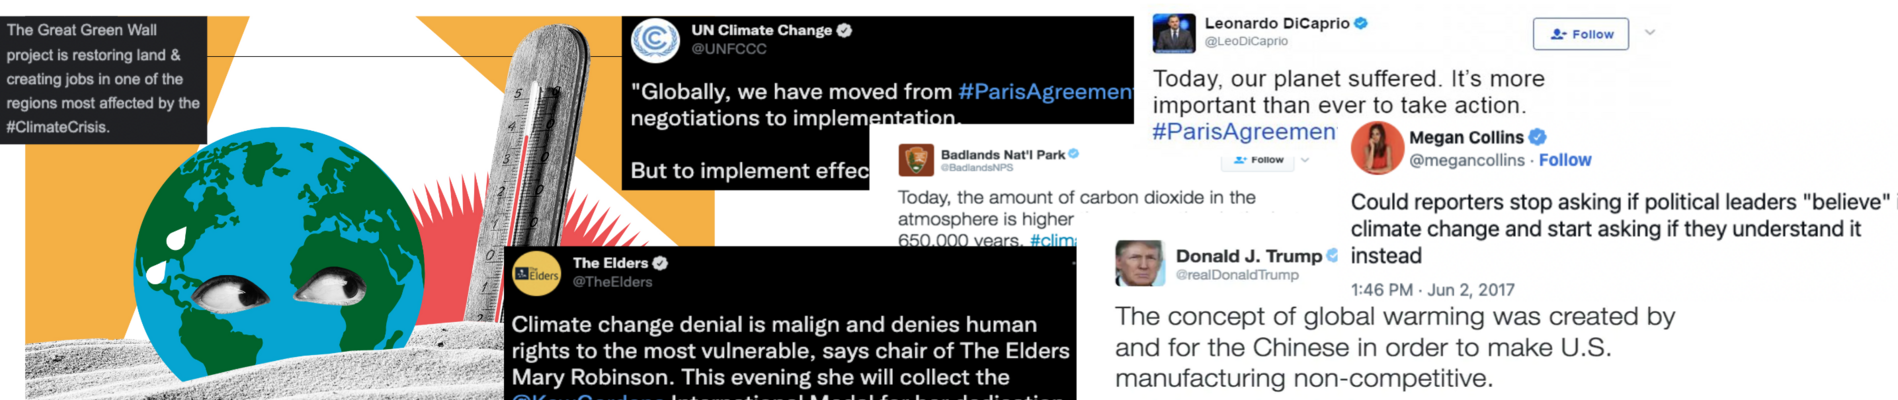

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

# Introduction


In the wake of unprecedented changes in our natural environment, the discourse on climate change has evolved into one of the most critical conversations of our time. As the Earth undergoes transformations, the need to understand how societies perceive and respond to these changes becomes paramount. The data at our disposal serves as a crucial lens through which we can explore public perspectives on climate change and delve into the question of whether it is universally regarded as a real threat.

Dataset Description

- The collection of this data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo. The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43,943 tweets were collected. Each tweet is labelled as one of 4 classes, which are described below.

Class Description

- 2 News: the tweet links to factual news about climate change

- 1 Pro: the tweet supports the belief of man-made climate change

- 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change

- -1 Anti: the tweet does not believe in man-made climate change Variable definitions

Features

sentiment: Which class a tweet belongs in (refer to Class Description above)

- message: Tweet body

- tweetid: Twitter unique id

The files provided

train.csv - You will use this data to train your model.

test.csv - You will use this data to test your model.

<a id="one"></a>

## 1. Importing Packages

<a href=#cont>Back to Table of Contents</a>

---

| ⚡ Description: Importing Packages ⚡                                                                                                    |
| :--------------------------------------------------------------------------------------------------------------------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---


In [122]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
import nltk
import re
import string
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
nltk.download('vader_lexicon')
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression #Import Logistic Regression from the sklearn
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.feature_selection import VarianceThreshold
from wordcloud import WordCloud,ImageColorGenerator
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.feature_extraction.text import CountVectorizer #Import CountVectorizer from sklearn
from sklearn.preprocessing import StandardScaler
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\percy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\percy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\percy\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\percy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\percy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\percy\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


<a id="two"></a>

## 2. Loading the Data

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

| ⚡ Description: Loading the data ⚡                                                          |
| :------------------------------------------------------------------------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [123]:
df_test = pd.read_csv (r"C:\Users\percy\Downloads\Advanced_Classification_Predict-student_data-2780\test_with_no_labels.csv")


In [124]:
df_train = pd.read_csv(r"C:\Users\percy\Downloads\Advanced_Classification_Predict-student_data-2780\train.csv")


data processing

<a id="three"></a>

## 3. Exploratory Data Analysis (EDA)

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

| ⚡ Description: Exploratory data analysis ⚡                                                             |
| :------------------------------------------------------------------------------------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


The EDA  includes:
- Summary analysis
- Null values
- Classes of tweets - Sentiments
- Number of words of tweets



In [125]:
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [126]:
df_test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


Summary analysis

In [127]:
df_test.describe()


,tweetid
count,10546.000000
mean,496899.936943
std,288115.677148
min,231.000000
25%,246162.500000
50%,495923.000000
75%,742250.000000
max,999983.000000


In [128]:
df_train.describe()


,sentiment,tweetid
count,15819.000000,15819.000000
mean,0.917504,501719.433656
std,0.836537,289045.983132
min,-1.000000,6.000000
25%,1.000000,253207.500000
50%,1.000000,502291.000000
75%,1.000000,753769.000000
max,2.000000,999888.000000


Null values

In [129]:
df_test.isnull().sum()

message    0
tweetid    0
dtype: int64

In [130]:
df_train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

There are no null values in the test and train data

Ckecking the number of rows and columns in our data

In [131]:
df_train.shape

(15819, 3)

In [132]:
df_test.shape

(10546, 2)

- There are 3 columns and 15819 rows in train data
- There are 2 coluns and 10546 rows in test data

Sentiments meaning as mentioned in the introduction

- Negative climate Change = -1
- Neutral = 0
- Positive Climate change = 1
- News = 2

Comparing the number of tweets of sentiments
- Distribution
- Pie chart
- Word cloud
- Top 20 words used

Bar chart showing the counts of tweets per sentiment

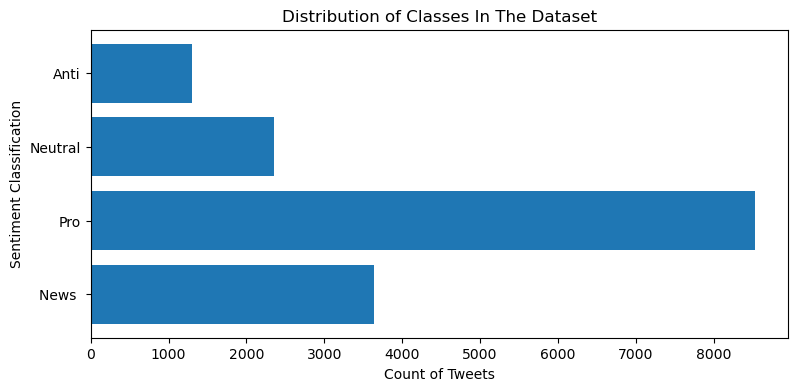

In [133]:
senti_counts = df_train["sentiment"].value_counts()
news = senti_counts[2] 
pro = senti_counts[1]   
neutral = senti_counts[0]
anti = senti_counts[-1]  

plt.figure( figsize=(9,4))
plt.barh(['News ','Pro','Neutral','Anti'], [news,pro,neutral,anti]) # horizontal bar graph to compare classes of tweets.
plt.colours = ['red', 'green', 'blue', 'orange']
plt.xlabel('Count of Tweets') #X-label of the data
plt.ylabel('Sentiment Classification') #Y_label of the data 
plt.title('Distribution of Classes In The Dataset') #Give the data a title 'Dataset lables distribution'
plt.show()

Pie chart showing the percentages of tweets per sentiment - Which one has the highest proportion between news and pro climate change

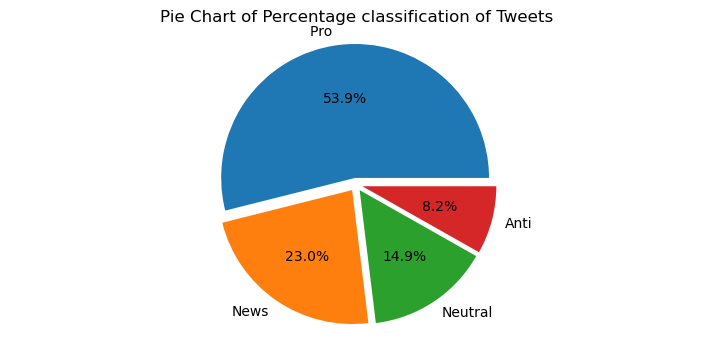

In [134]:
class_counts = df_train["sentiment"].value_counts()
plt.figure( figsize=(9,4))
plt.pie(class_counts, labels=['Pro ','News','Neutral','Anti'], explode=[0.05,0.05,0.05,0.05], autopct='%1.1f%%')
plt.title("Pie Chart of Percentage classification of Tweets ")
plt.axis('equal')
plt.show()

Insights:
- News has the highest percentage of tweets followed by Pro climate change, Neutral and anti climate change respectively

<a id="four"></a>

## 4. Feature Engineering

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

| ⚡ Description Feature engineering ⚡                                                                                        |
| :------------------------------------------------------------------------------------------------------------------------- |
| In this section we cleaned the data, added new features- as identified in the EDA phase. |

---


 4.1 Adding and removing columns

Adding Length tweets column

In [135]:
length = [len(tweet) for tweet in df_train['message']]
df_train['length'] = length

Comparing the *length of the tweet* per categories
- Box plots
- Distribution bar graphs
- Summary of Stats
- Correlation

Box plot

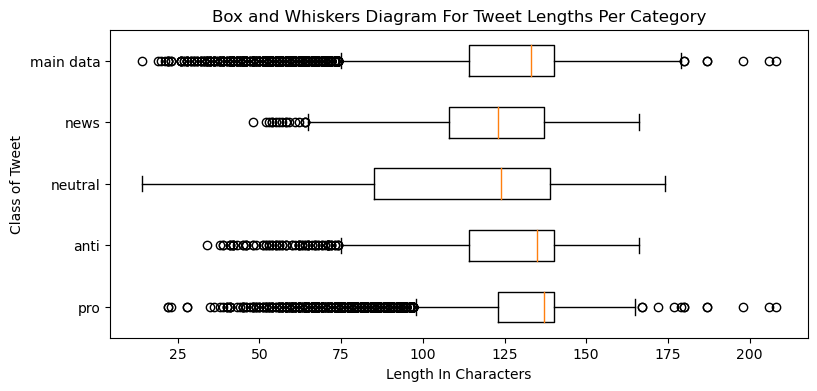

In [136]:
#creating class subsets for the datase
df_anti = df_train.copy()[df_train['sentiment'] == -1]
df_neutral = df_train.copy()[df_train['sentiment'] == 0]
df_pro = df_train.copy()[df_train['sentiment'] == 1]
df_news = df_train.copy()[df_train['sentiment'] == 2]

#storing the size data in separate variables
pro_len = df_pro['length']
neutral_len = df_neutral['length']
anti_len = df_anti['length']
news_len = df_news['length']
data_len = df_train['length']

#creating a list of all the length datasets
len_data = [pro_len, anti_len, neutral_len, news_len, data_len]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(9,4))

# Create the box plots
ax.boxplot(len_data, vert=False)

# Set the labels for each box plot
labels = ['pro', 'anti', 'neutral', 'news', 'main data']
ax.set_yticklabels(labels)

# Set the title and axis labels
plt.title('Box and Whiskers Diagram For Tweet Lengths Per Category')
plt.xlabel('Length In Characters')
plt.ylabel('Class of Tweet')

# Show the plot
plt.show()

Summary

In [137]:
print('mean of pro-climate is:  ', round(df_pro['length'].mean(),2))
round(df_pro['length'].describe(),2)

mean of pro-climate is:   128.97


count    8530.00
mean      128.97
std        19.96
min        22.00
25%       123.00
50%       137.00
75%       140.00
max       208.00
Name: length, dtype: float64

In [138]:
print('mean of anti-climate is:  ', round(df_anti['length'].mean(),2))
round(df_anti['length'].describe(),2)

mean of anti-climate is:   123.73


count    1296.00
mean      123.73
std        24.29
min        34.00
25%       114.00
50%       135.00
75%       140.00
max       166.00
Name: length, dtype: float64

In [139]:
print('mean of neutral-climate is:  ', round(df_neutral['length'].mean(),2))
round(df_neutral['length'].describe(),2)

mean of neutral-climate is:   110.93


count    2353.00
mean      110.93
std        32.36
min        14.00
25%        85.00
50%       124.00
75%       139.00
max       174.00
Name: length, dtype: float64

In [140]:
print('mean of news is:  ', round(df_news['length'].mean(),2))
round(df_news['length'].describe(),2)

mean of news is:   119.92


count    3640.00
mean      119.92
std        19.00
min        48.00
25%       108.00
50%       123.00
75%       137.00
max       166.00
Name: length, dtype: float64

The pro tweets length have the highest mean followed by anti, news and neutral respectively.

Bar graph

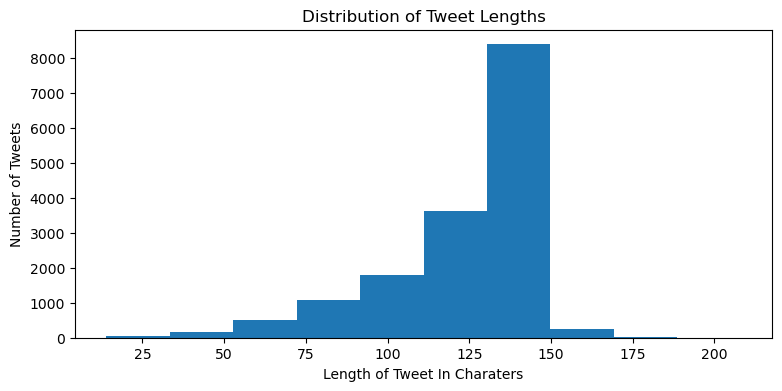

In [141]:
plt.figure( figsize=(9,4))
plt.hist(df_train['length'])
plt.title("Distribution of Tweet Lengths")
plt.xlabel("Length of Tweet In Charaters") #X-label of the data
plt.ylabel("Number of Tweets")      #Y_label of the data
plt.show()

The highest number of tweets lie between the 125 - 150 length of characters

Correlation between length of tweets and sentiment 

C:\Users\percy\AppData\Local\Temp\ipykernel_20732\28272172.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_train.corr()


Text(0.5, 1.0, 'Correlation with sentiments')

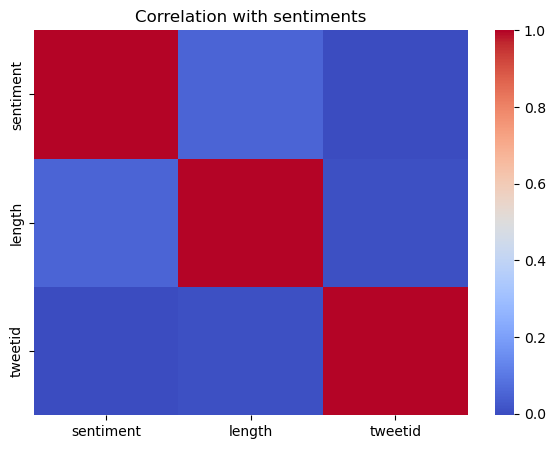

In [142]:
# Calculate the correlation matrix
correlation_matrix = df_train.corr()

# Calculate the correlations with the target variable
target_correlations = correlation_matrix['sentiment']

# Sort the features by their correlations with the target variable
sorted_features = target_correlations.abs().sort_values(ascending=False).index

# Reorder the correlation matrix
sorted_corr_matrix = correlation_matrix.loc[sorted_features, sorted_features]

# Create a heatmap for the sorted correlations without annotations
plt.figure(figsize=(7, 5))
sns.heatmap(sorted_corr_matrix, cmap='coolwarm')
plt.title('Correlation with sentiments')

There is no correlation between the tweet id, length and sentiment

Dropping tweet Id 

Reason: Tweet Id has no significance in our analysis as it is only a unique number of the tweet.

In [143]:
df_train = df_train.drop('tweetid', axis=1)

## 4.2 Data cleaning 
In order to process the tweet messages more effectively the tweets are cleaned using the clean function defined in the code cell below. The clean function does the following.

- Remove urls
- Convert all tweet text to lowercase.
- Remove punctuation, numbers & emojis
- Remove stopwords

Removing the web-urls

In [144]:
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
df_train['CleanMessage'] = df_train['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

Converting every word to lower case

In [145]:
df_train['CleanMessage'] = df_train['CleanMessage'].str.lower()
df_train['CleanMessage'].head()

0    polyscimajor epa chief doesn't think carbon di...
1    it's not like we lack evidence of anthropogeni...
2    rt @rawstory: researchers say we have three ye...
3    #todayinmaker# wired : 2016 was a pivotal year...
4    rt @soynoviodetodas: it's 2016, and a racist, ...
Name: CleanMessage, dtype: object

removing punctuations, numbers and emojis

In [146]:
def remove_punctuation(post):
    return ''.join([l for l in post if l not in string.punctuation])

In [147]:
df_train['CleanMessage'] = df_train['CleanMessage'].apply(remove_punctuation)
df_train['CleanMessage'].head()

0    polyscimajor epa chief doesnt think carbon dio...
1    its not like we lack evidence of anthropogenic...
2    rt rawstory researchers say we have three year...
3    todayinmaker wired  2016 was a pivotal year in...
4    rt soynoviodetodas its 2016 and a racist sexis...
Name: CleanMessage, dtype: object

In [148]:
df_train['CleanMessage'] = df_train['CleanMessage'].astype(str).apply(lambda x: re.sub("[^a-z]", " ", x))

df_train['CleanMessage'].head()

0    polyscimajor epa chief doesnt think carbon dio...
1    its not like we lack evidence of anthropogenic...
2    rt rawstory researchers say we have three year...
3    todayinmaker wired       was a pivotal year in...
4    rt soynoviodetodas its      and a racist sexis...
Name: CleanMessage, dtype: object

Stop words

In [149]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [150]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df_train['CleanMessage'] = df_train['CleanMessage'].apply(lambda text: cleaning_stopwords(text))

Word cloud showing top words used in every class in the cleaned data

In [151]:

text = " ".join(i for i in df_train['CleanMessage'])
text = str(text)

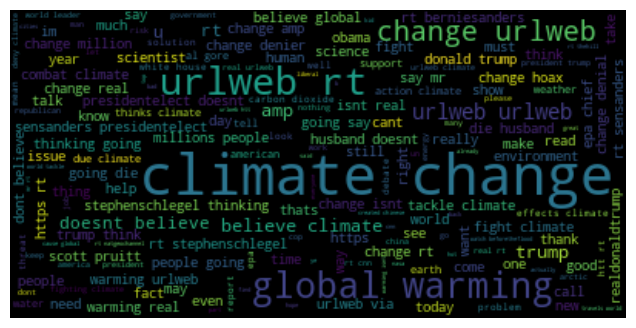

In [152]:
wordcloud = WordCloud()
tweet_cloud = wordcloud.generate(text)
plt.figure( figsize=(9,4))
plt.imshow(tweet_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Climate change and Global warming are the two most tweeted words in our data

Top 20 words in the tweets cleaned data

In [153]:
freq_dict = {}
words = text.split(" ")
for word in words:
    if word != " " and word !="":
        if word not in freq_dict:
            freq_dict[word] = 1
        else:
            freq_dict[word] += 1

In [154]:
sorted_freq_dict = sorted(freq_dict.items(), key=lambda x:x[1], reverse=True)[:20]
top_10_words = dict(sorted_freq_dict)

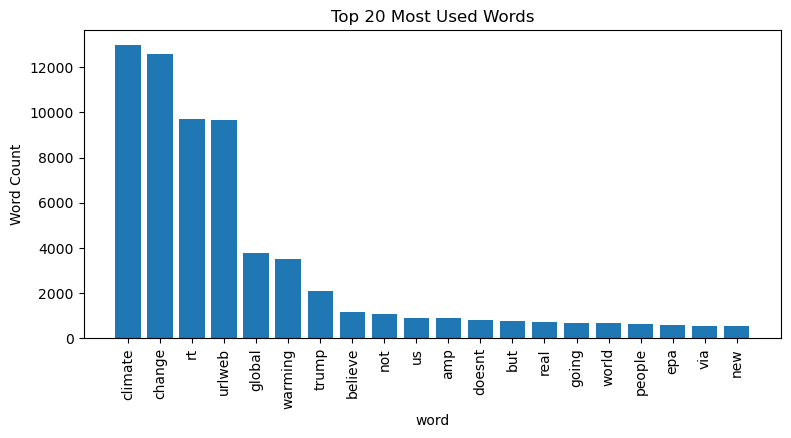

In [155]:
x_labels = list(top_10_words.keys())
values = list(top_10_words.values())

# Create the figure and axes
fig, ax = plt.subplots(figsize=(9,4))

# Plot the data
ax.bar(x_labels, values)

# Customize the plot
ax.set_xlabel('word')
ax.set_ylabel('Word Count')
ax.set_title('Top 20 Most Used Words')

# Rotate the x-labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()

The top of words used
- 1. Climate
- 2. Change
- 3. rt
- 4. urlweb
- 5. Global
- 6. Warming
- 7. trump
- 8. believe
- 9. not
- 10. us


The most used words of the anti climate change

In [156]:
#creating class subsets for the datase
df_anti = df_train.copy()[df_train['sentiment'] == -1]
df_neutral = df_train.copy()[df_train['sentiment'] == 0]
df_pro = df_train.copy()[df_train['sentiment'] == 1]
df_news = df_train.copy()[df_train['sentiment'] == 2]

In [157]:

text = " ".join(i for i in df_anti["CleanMessage"])
text = str(text)

In [158]:
freq_dict = {}
words = text.split(" ")
for word in words:
    if word != " " and word !="":
        if word not in freq_dict:
            freq_dict[word] = 1
        else:
            freq_dict[word] += 1

In [159]:
sorted_freq_dict = sorted(freq_dict.items(), key=lambda x:x[1], reverse=True)[:20]
top_10_words = dict(sorted_freq_dict)

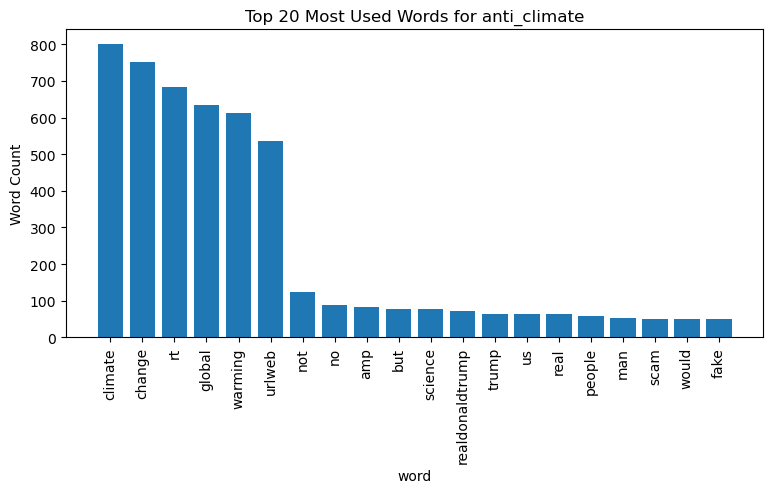

In [160]:
x_labels = list(top_10_words.keys())
values = list(top_10_words.values())

# Create the figure and axes
fig, ax = plt.subplots(figsize=(9,4))

# Plot the data
ax.bar(x_labels, values)

# Customize the plot
ax.set_xlabel('word')
ax.set_ylabel('Word Count')
ax.set_title('Top 20 Most Used Words for anti_climate')

# Rotate the x-labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()

The top of words used for anti
- 1. Climate
- 2. Change
- 3. rt
- 4. Global
- 5. Warming
- 6. urlweb
- 7. not
- 8. no
- 9. Global
- 10. Warming
- 11. trump
- 12. believe
- 13. not
- 14. us
- 15. real
- 16. People
- 17. man
- 18. scam
- 19. would
- 20. fake 


In [40]:
text = " ".join(i for i in df_pro["CleanMessage"])
text = str(text)

In [42]:
freq_dict = {}
words = text.split(" ")
for word in words:
    if word != " " and word !="":
        if word not in freq_dict:
            freq_dict[word] = 1
        else:
            freq_dict[word] += 1


In [43]:
sorted_freq_dict = sorted(freq_dict.items(), key=lambda x:x[1], reverse=True)[:20]
top_10_words = dict(sorted_freq_dict)

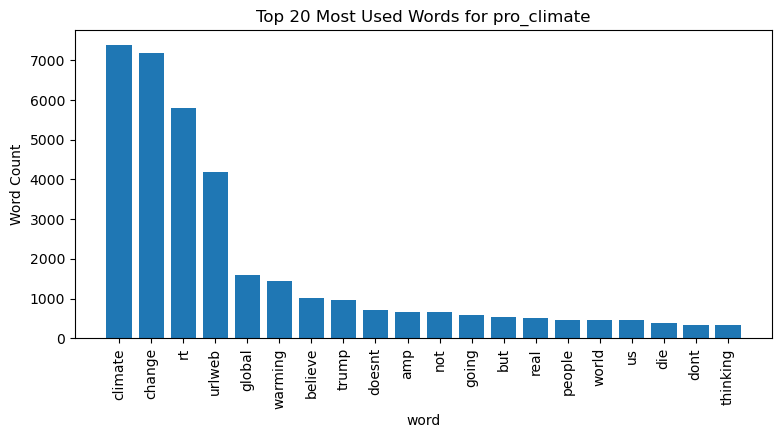

In [121]:
x_labels = list(top_10_words.keys())
values = list(top_10_words.values())

# Create the figure and axes
fig, ax = plt.subplots(figsize=(9,4))

# Plot the data
ax.bar(x_labels, values)

# Customize the plot
ax.set_xlabel('word')
ax.set_ylabel('Word Count')
ax.set_title('Top 20 Most Used Words for pro_climate')

# Rotate the x-labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()

The top of words used for pro
- 1. Climate
- 2. Change
- 3. rt
- 4. urlweb
- 5. Global
- 6. Warming
- 7. believe
- 8. trump
- 9. doesnt
- 10. amp
- 11. not
- 12. going
- 13. but
- 14. real
- 15. people
- 16. real
- 17. us
- 18. die
- 19. dont
- 20. thinking


Cleaning also included:
- Tokenization
- Stemming
- Lemmatization

Applying Tokenization

A tokeniser divides text into a sequence of tokens, which roughly correspond to "words"

In [45]:
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
tokeniser = TreebankWordTokenizer()
df_train['tokens'] = df_train['CleanMessage'].apply(tokeniser.tokenize)

Applying stemming

Stemming is the process of transforming to the root word. It uses an algorithm that removes common word-endings from English words, such as “ly,” “es,” “ed,” and “s.”

In [46]:
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
df_train['CleanMessage']= df_train['CleanMessage'].apply(lambda x: stemming_on_text(x))


Applying lemmatizer

Lemmatizing is the process of grouping words of similar meaning together. So, your root stem, meaning the word you end up with, is not something you can just look up in a dictionary, but you can look up a lemma.

In [47]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
df_train['CleanMessage'] = df_train['CleanMessage'].apply(lambda x: lemmatizer_on_text(x))


4.3 Text Feature extraction

Text feature extraction is the process of transforming what is essentially a list of words into a feature set that is usable by a classifier. The NLTK classifiers expect dict style feature sets, so we must therefore transform our text into a dict

We added the following features to modify our and for more insights:
- Bag of words
- TFIDVectorizer

Bag of words

The Bag of Words model is the simplest method; it constructs a word presence feature set from all the words in the text, indicating the number of times each word has appeared.

In [48]:
def bag_of_words_count(words, word_dict={}):
    """ this function takes in a list of words and returns a dictionary 
        with each word as a key, and the value represents the number of 
        times that word appeared"""
    for word in words:
        if word in word_dict.keys():
            word_dict[word] += 1
        else:
            word_dict[word] = 1
    return word_dict

In [49]:
unique_sentiment = list(df_train["sentiment"].unique())
print(unique_sentiment)

[1, 2, 0, -1]


In [50]:
df_train.head()

,sentiment,message,length,CleanMessage,tokens
0,1,PolySciMajor EPA chief doesn't think carbon di...,140,polyscimajor epa chief doesnt think carbon dio...,"[polyscimajor, epa, chief, doesnt, think, carb..."
1,1,It's not like we lack evidence of anthropogeni...,62,not like lack evidence anthropogenic global wa...,"[not, like, lack, evidence, anthropogenic, glo..."
2,2,RT @RawStory: Researchers say we have three ye...,140,rt rawstory researchers say three years act cl...,"[rt, rawstory, researchers, say, three, years,..."
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,99,todayinmaker wired pivotal year war climate ch...,"[todayinmaker, wired, pivotal, year, war, clim..."
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",122,rt soynoviodetodas racist sexist climate chang...,"[rt, soynoviodetodas, racist, sexist, climate,..."


In [51]:
personality = {}
for pp in unique_sentiment:
    df = df_train.groupby('sentiment')
    personality[pp] = {}
    for row in df.get_group(pp)['tokens']:
        personality[pp] = bag_of_words_count(row, personality[pp])       

In [52]:
all_words = set()
for pp in unique_sentiment:
    for word in personality[pp]:
        all_words.add(word)

In [53]:
personality['all'] = {}
for pp in unique_sentiment:    
    for word in all_words:
        if word in personality[pp].keys():
            if word in personality['all']:
                personality['all'][word] += personality[pp][word]
            else:
                personality['all'][word] = personality[pp][word]

In [54]:
total_words = sum([v for v in personality['all'].values()])
total_words

195215

Text(0.5, 0, 'word frequency')

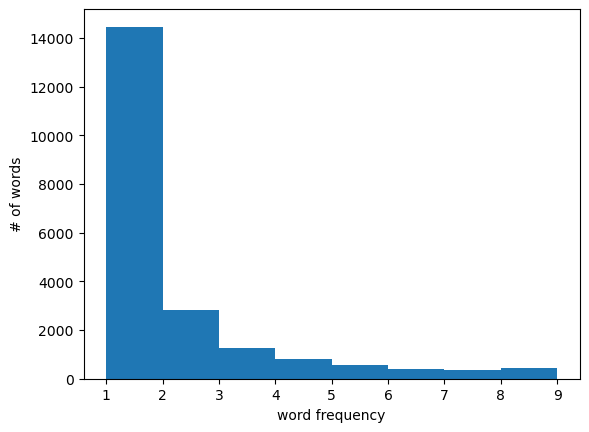

In [55]:
all_words = plt.hist([v for v in personality['all'].values() if v < 10],bins=8)
plt.ylabel("# of words")
plt.xlabel("word frequency")

In [56]:
len([v for v in personality['all'].values() if v == 1])

14467

In [57]:
len([v for v in personality['all'].values() if v == 10])

165

Looking for rare words in our data
- that occurs once
- that occurs less than 10 times
- that occur 100 times

In [58]:
rare_words = [k for k, v in personality['all'].items() if v==1] 
print(rare_words[:100])

['vultures', 'kkaaria', 'notarealnun', 'conditioners', 'insignificant', 'kellysgallagher', 'drawn', 'fundamentals', 'christinaalynch', 'olson', 'nurses', 'mines', 'ddentner', 'wellness', 'neatoday', 'forbestech', 'saidshe', 'ggwp', 'drjudystone', 'xocaiiit', 'technologist', 'leftright', 'angusol', 'saas', 'merelynora', 'whosimmortal', 'wort', 'jose', 'pcbs', 'defender', 'seeping', 'climatica', 'memelordnorv', 'thenehatyagi', 'regression', 'juliaoftoronto', 'gapol', 'kristenobacter', 'undergo', 'hehasnttweeted', 'priceonit', 'gavinpolone', 'foundthis', 'nzilaannan', 'javiersolana', 'kalaax', 'potato', 'comedy', 'sendonnelly', 'stateoftheenvironment', 'rin', 'sum', 'realitybased', 'emerald', 'michiganradio', 'tix', 'nyclimate', 'annaleen', 'healthlives', 'perlan', 'divert', 'londonattack', 'ploughshares', 'collector', 'isismaese', 'equilibrium', 'wisdomforwomen', 'repeats', 'stephencolwell', 'causewereguys', 'fraken', 'shividwivedi', 'giss', 'laffy', 'venmo', 'eclipses', 'grasses', 'njsu

In [59]:
# Words that appear more than 10 times 
com_words = [k for k, v in personality['all'].items() if v>10] 
print(rare_words[:100])

['vultures', 'kkaaria', 'notarealnun', 'conditioners', 'insignificant', 'kellysgallagher', 'drawn', 'fundamentals', 'christinaalynch', 'olson', 'nurses', 'mines', 'ddentner', 'wellness', 'neatoday', 'forbestech', 'saidshe', 'ggwp', 'drjudystone', 'xocaiiit', 'technologist', 'leftright', 'angusol', 'saas', 'merelynora', 'whosimmortal', 'wort', 'jose', 'pcbs', 'defender', 'seeping', 'climatica', 'memelordnorv', 'thenehatyagi', 'regression', 'juliaoftoronto', 'gapol', 'kristenobacter', 'undergo', 'hehasnttweeted', 'priceonit', 'gavinpolone', 'foundthis', 'nzilaannan', 'javiersolana', 'kalaax', 'potato', 'comedy', 'sendonnelly', 'stateoftheenvironment', 'rin', 'sum', 'realitybased', 'emerald', 'michiganradio', 'tix', 'nyclimate', 'annaleen', 'healthlives', 'perlan', 'divert', 'londonattack', 'ploughshares', 'collector', 'isismaese', 'equilibrium', 'wisdomforwomen', 'repeats', 'stephencolwell', 'causewereguys', 'fraken', 'shividwivedi', 'giss', 'laffy', 'venmo', 'eclipses', 'grasses', 'njsu

In [60]:
# how many words appear more than 10 times?
print(len([v for v in personality['all'].values() if v >= 10]))
# how many words of the total does that account for?
occurs_more_than_10_times = sum([v for v in personality['all'].values() if v >= 10])
print(occurs_more_than_10_times)

2302
156759


In [61]:
max_count = 10
remaining_word_index = [k for k, v in personality['all'].items() if v > max_count]
remaining_word_index

['survive',
 'seriously',
 'diabetes',
 'stave',
 'park',
 'millions',
 'caps',
 'trigger',
 'ones',
 'antiscience',
 'spreading',
 'report',
 'dollars',
 'lastweektonight',
 'island',
 'rolling',
 'become',
 'fun',
 'behind',
 'mentions',
 'warming',
 'know',
 'weve',
 'names',
 'theres',
 'whats',
 'golf',
 'influence',
 'needed',
 'imagine',
 'christian',
 'laws',
 'marks',
 'acting',
 'insane',
 'melt',
 'amid',
 'sec',
 'none',
 'space',
 'combat',
 'politico',
 'cop',
 'open',
 'film',
 'beijing',
 'grand',
 'fake',
 'th',
 'survey',
 'suffering',
 'comments',
 'criticizes',
 'discussions',
 'cnn',
 'channel',
 'problems',
 'al',
 'alias',
 'decided',
 'measures',
 'disaster',
 'feeling',
 'gas',
 'refuses',
 'done',
 'teach',
 'la',
 'threatens',
 'online',
 'hillary',
 'bears',
 'climatecentral',
 'gt',
 'flat',
 'grist',
 'war',
 'corrupt',
 'moon',
 'yet',
 'noncompetiti',
 'parts',
 'matter',
 'washed',
 'worldwildlife',
 'turnbull',
 'richarddawkins',
 'lost',
 'welcome',
 

Term Frequency – Inverse Document Frequency (TF – IDF)

In [62]:
obj = TfidfVectorizer()
corpus = df_train["message"]
X = obj.fit_transform(corpus)
print (X)

  (0, 17819)	0.29617953391365087
  (0, 29419)	0.17919926422611793
  (0, 31171)	0.4083807629436574
  (0, 6552)	0.0685938251926709
  (0, 13502)	0.06563679654204725
  (0, 30178)	0.17000387831408595
  (0, 29832)	0.27500470572274316
  (0, 2968)	0.11167930341655102
  (0, 29896)	0.10281932328060743
  (0, 12011)	0.10018392293695356
  (0, 20208)	0.09946418435998201
  (0, 5682)	0.21540366535326275
  (0, 17537)	0.28184336593277864
  (0, 14605)	0.09816618321079935
  (0, 8392)	0.24742439027234542
  (0, 5534)	0.21805790613752135
  (0, 27605)	0.1959115811865097
  (0, 8694)	0.16310935709469898
  (0, 6065)	0.22305131300999193
  (0, 9847)	0.17641536800457827
  (0, 21784)	0.4083807629436574
  (1, 3128)	0.52094265118164
  (1, 10106)	0.3932716987989639
  (1, 16408)	0.4980168835789958
  (1, 30027)	0.2199002975347319
  :	:
  (15817, 27728)	0.33170980422665547
  (15817, 7222)	0.3100987527608332
  (15817, 16862)	0.26955708032839304
  (15817, 13300)	0.181220288532438
  (15817, 4207)	0.21234098193339193
  (15817

<a id="five"></a>

## 5. Modelling

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

| ⚡ Description: Modelling ⚡                                                                                                                |
| :------------------------------------------------------------------------------------------------------------------------------------------ |
| In this section, you are required to create one or more regression models that are able to accurately predict the twitter sentiments. |

---


### Pre processing

The line X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=50) is splitting the data into training and validation sets.

X and y are the feature matrix and target variable, respectively. X contains the features we use to make predictions, and y contains the corresponding target values (in this case, sentiment).

train_test_split() is a function provided by scikit-learn (a popular machine learning library) that is used to split a dataset into training and validation subsets.

The function takes the following arguments:

X: The feature matrix (independent variables). y: The target variable (dependent variable). test_size: This parameter specifies the proportion of the data that should be used for the validation set. In this case, it's set to 0.2, meaning 20% of the data will be used for validation, and the remaining 80% for training. random_state: This is a seed for the random number generator used in the data splitting process. Setting this to a specific value (e.g., 42) ensures that the split is reproducible.

train_test_split() returns four sets of data:

X_train: This contains the feature data for the training set. X_val: This contains the feature data for the validation set. y_train: This contains the target data for the training set. y_val: This contains the target data for the validation set. By splitting the data into training and validation sets, you can train your machine learning model on a portion of the data (X_train and y_train) and evaluate its performance on another portion that it hasn't seen during training (X_val and y_val). This allows us to estimate how well your model is likely to perform on unseen data (seen in Model Performance section).

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
df_train.head()

,sentiment,message,length,CleanMessage,tokens
0,1,PolySciMajor EPA chief doesn't think carbon di...,140,polyscimajor epa chief doesnt think carbon dio...,"[polyscimajor, epa, chief, doesnt, think, carb..."
1,1,It's not like we lack evidence of anthropogeni...,62,not like lack evidence anthropogenic global wa...,"[not, like, lack, evidence, anthropogenic, glo..."
2,2,RT @RawStory: Researchers say we have three ye...,140,rt rawstory researchers say three years act cl...,"[rt, rawstory, researchers, say, three, years,..."
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,99,todayinmaker wired pivotal year war climate ch...,"[todayinmaker, wired, pivotal, year, war, clim..."
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",122,rt soynoviodetodas racist sexist climate chang...,"[rt, soynoviodetodas, racist, sexist, climate,..."


In [65]:
#Splitting features and target variables
X = df_train['CleanMessage'] #X is the features of the cleaned tweets
y = df_train['sentiment']    #Y is the target variable which is the train sentiment

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) #Splitting train set into training and testing data
#Print out the shape of the training set and the testing set
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12655,)
(3164,)
(12655,)
(3164,)


C:\Users\percy\AppData\Local\Temp\ipykernel_20732\3481481777.py:18: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.set_xlim(-0.5, len(steps), 1)


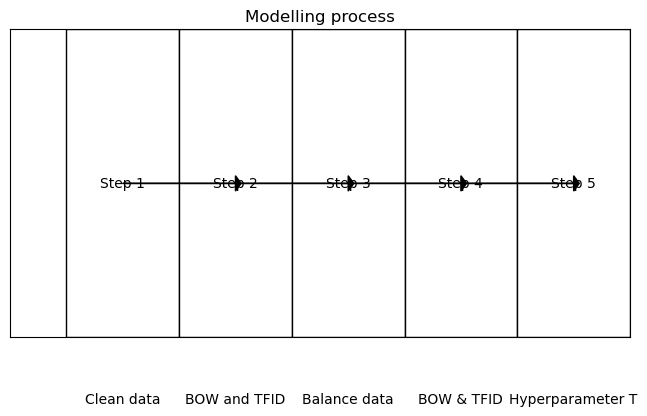

In [68]:

# Create a step-by-step flow diagram
steps = ['Step 1', 'Step 2', 'Step 3', 'Step 4', 'Step 5']
actions = ['Clean data', 'BOW and TFID', 'Balance data', 'BOW & TFID', 'Hyperparameter T']

fig, ax = plt.subplots(figsize=(8, 4))

# Draw rectangles for each step
for i, step in enumerate(steps):
    rect = mpatches.Rectangle((i, 0), 1, 1, ec='black', fc='White')
    ax.add_patch(rect)
    ax.text(i + 0.5, 0.5, step, ha='center', va='center', color='black')

# Draw arrows between steps
for i in range(len(steps) - 1):
    ax.arrow(i + 0.5, 0.5, 1, 0, head_width=0.05, head_length=0.05, fc='black', ec='black')

# Set axis limits and remove ticks
ax.set_xlim(-0.5, len(steps), 1)
ax.set_ylim(0, 1)
ax.set_xticks([])
ax.set_yticks([])

# Add action labels below steps
for i, action in enumerate(actions):
    ax.text(i + 0.5, -0.2, action, ha='center', va='center', color='black')

plt.title('Modelling process')
plt.show()



## 5.A Modelling - Clean data


In building a model to classify twitter sentiments for climate change we used the following classifiers on clean data:
-  Logistic Regression
- Linear & non linear SVC
- Decision Trees
- Naive Bayes
- KNN

The modelling was done using the bag words and Term Frequency – Inverse Document Frequency (TF – IDF)

In [69]:
cf = CountVectorizer() 

In [70]:
tfidf = TfidfVectorizer()


Scaling
- Scalling reduced the prefomance of our models so we used unscaled data

### A. Logistic Regression - Bag of words
it makes use of a common S-shaped curve known as the logistic function. This curve is commonly known as a sigmoid. It solves the problem for the following reasons:

-  It squeezes the range of output values to exist only between 0 and 1.
-  It has a point of inflection, which can be used to separate the feature space into two distinct areas (one for each class).
-  It has shallow gradients at both its top and bottom, which can be mapped to zeroes or ones respectively with little ambiguity.

In [71]:
lr = LogisticRegression() #Call logistic regression model and assign variable 'model'

lrBOW = Pipeline([('cf', cf), ('clf', lr)]) #Create a pipeline with the logistic model and tf-idf vectorizer


lrBOW.fit(X_train, y_train) #Fit the training set

y_pred= lrBOW.predict(X_test) #Fit the test set

print('accuracy %s' % accuracy_score(y_pred, y_test)) #Print accuracy
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print f1 score
print(classification_report(y_test, y_pred)) #Print classification report

accuracy 0.7468394437420987
f1_score 0.7399161081756703
              precision    recall  f1-score   support

          -1       0.74      0.42      0.54       278
           0       0.55      0.50      0.52       425
           1       0.78      0.85      0.81      1755
           2       0.76      0.77      0.77       706

    accuracy                           0.75      3164
   macro avg       0.71      0.64      0.66      3164
weighted avg       0.74      0.75      0.74      3164



c:\Users\percy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


-  For the logisctic regression precision, recall and f1-score values for the pro and news class are higher.Most tweets falls under pro class and news so the model gets better at classifiying them because it has more evidence of them.

- The neutral and negative class are lower.


## B Linear SVM - Bag of words

Separate points using a  (p−1)
  dimensional hyperplane. This means that the SVM will construct a decision boundary such that points on the left are assigned a label of  A
  and points on the right are assigned a label of  B
 . When finding this separating hyperplane we wish to maximise the distance of the nearest points to the hyperplane. The technical term for this is maximum separating hyperplane. The data points which dictate where the separating hyperplane goes are called support vectors. 

In [72]:
#Create a pipeline and make predictions of the bag of words using linearSVC
from sklearn.svm import LinearSVC #Import LinearSVC from the sklearn


LSVCBOW= Pipeline([('cf', cf),('clf',  LinearSVC())]) #Create a pipeline with the bag or words features and the linearSVC

LSVCBOW.fit(X_train, y_train) #Fit the training data to the pipeline

y_pred = LSVCBOW.predict(X_test) #Make predictions with the test data

print('accuracy %s' % accuracy_score(y_pred, y_test)) #Print out the accuracy
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print out the f1 score
print(classification_report(y_test, y_pred)) #Print out the classification repor

c:\Users\percy\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


accuracy 0.7285082174462706
f1_score 0.7255578119167845
              precision    recall  f1-score   support

          -1       0.64      0.50      0.56       278
           0       0.51      0.48      0.49       425
           1       0.79      0.80      0.80      1755
           2       0.72      0.78      0.75       706

    accuracy                           0.73      3164
   macro avg       0.67      0.64      0.65      3164
weighted avg       0.72      0.73      0.73      3164



###  C. non Linear SVM - Bag of words

In [74]:
#Create a pipeline and make predictions of the bag of words using linearSVC
from sklearn.svm import SVC #Import LinearSVC from the sklearn


nLSVCBOW= Pipeline([('cf', cf),('clf',  SVC())]) #Create a pipeline with the bag or words features and the linearSVC

nLSVCBOW.fit(X_train, y_train) #Fit the training data to the pipeline

y_pred = nLSVCBOW.predict(X_test) #Make predictions with the test data

print('accuracy %s' % accuracy_score(y_pred, y_test)) #Print out the accuracy
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print out the f1 score
print(classification_report(y_test, y_pred)) #Print out the classification repor

accuracy 0.7370417193426043
f1_score 0.7145464632688455
              precision    recall  f1-score   support

          -1       0.88      0.23      0.37       278
           0       0.65      0.39      0.49       425
           1       0.74      0.88      0.80      1755
           2       0.75      0.78      0.76       706

    accuracy                           0.74      3164
   macro avg       0.75      0.57      0.61      3164
weighted avg       0.74      0.74      0.71      3164



- Similarly to Logistic regression, The non LSVC precision, recall and f1-score values for the pro and news class are higher.Most tweets falls under pro class and news so the model gets better at classifiying them because it has more evidence of them.

- The neutral and negative class are lower.

- The perfomance of non LSVC is slightly lower that Logisctic regression


### D Decision Trees - Bag of Words

A decision tree is a decision support tool that uses a tree-like graph or model of decisions and their possible consequences. It is one way to display an algorithm that only contains conditional control statements.

Decision trees are extremely intuitive ways to classify objects or predict continuous values: you simply ask a series of questions designed to zero-in on the classification/prediction.

In [76]:
from sklearn.tree import DecisionTreeClassifier

DTBOW= Pipeline([('cf', cf),('clx',  DecisionTreeClassifier(random_state=42))]) #Create a pipeline with the bag or words features and the linearSVC

DTBOW.fit(X_train, y_train) #Fit the training data to the pipeline

y_pred = DTBOW.predict(X_test) #Make predictions with the test data

print('accuracy %s' % accuracy_score(y_pred, y_test)) #Print out the accuracy
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print out the f1 score
print(classification_report(y_test, y_pred)) #Print out the classification repor

accuracy 0.6589759797724399
f1_score 0.6557853430510712
              precision    recall  f1-score   support

          -1       0.50      0.33      0.40       278
           0       0.43      0.45      0.44       425
           1       0.74      0.74      0.74      1755
           2       0.64      0.73      0.68       706

    accuracy                           0.66      3164
   macro avg       0.58      0.56      0.56      3164
weighted avg       0.66      0.66      0.66      3164



 Similarly to Logistic regression, The Decision Trees model precision, recall and f1-score values for the pro and news class are higher.Most tweets falls under pro class and news so the model gets better at classifiying them because it has more evidence of them.

- The neutral and negative class are lower.

- The perfomance of Decision Trees is lower that Logisctic regression and LVC

### E. NAIVE BAYES (Bernoulli) - Bag of words

Naive Bayes is a classification algorithm that uses the principle of Bayes theorem to make classifications.The assumption is Naive because it often does not hold. The assumption of independence implies that the model assumes that there is zero correlation among the features. Hence, the joint probability distribution  P(X,Y)
  can be obtained from the marginal probability distributions  P(X)
  and  P(Y)
  simply by multiplication. We will use the above independence assumption, conditional probability rules, and Bayes theorem to develop some theory for how the Naive Bayes model works.

In [77]:
from sklearn.naive_bayes import  BernoulliNB
naive_bayes =  BernoulliNB()
nb= Pipeline([('cf', cf),('nb',  naive_bayes)]) #Create a pipeline with the bag or words features and the linearSVC

nb.fit(X_train, y_train) #Fit the training data to the pipeline

y_pred = nb.predict(X_test) #Make predictions with the test data
print('accuracy %s' % accuracy_score(y_pred, y_test)) #Print the accuracy
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print the f1-score
print(classification_report(y_test, y_pred)) #Print the classification report
               

accuracy 0.6921618204804045
f1_score 0.6317389903558375
              precision    recall  f1-score   support

          -1       1.00      0.04      0.07       278
           0       0.68      0.14      0.23       425
           1       0.67      0.94      0.78      1755
           2       0.79      0.66      0.72       706

    accuracy                           0.69      3164
   macro avg       0.78      0.45      0.45      3164
weighted avg       0.73      0.69      0.63      3164



 Similarly to Logistic regression, The Naive Bayes model precision, recall and f1-score values for the pro and news class are higher.Most tweets falls under pro class and news so the model gets better at classifiying them because it has more evidence of them.

- The neutral and negative class are lower.

- The F1_score of Naive Bayes is lower that Logisctic regression, LVC and Decision Trees. But is accuracy is higher than Decision Trees

### F. K Nearest Neighbours - Bag of words

In principle, this algorithm works by assigning the majority class of the N closest neighbors to the current data point. As such, absolutely no training is required for the algorithm! All we do is choose K (i.e. the number of neighbors to consider), choose a distance function to calculate proximity and we're good to go.

In [78]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(10)
Knb= Pipeline([('cf', cf),('cnb', knn)]) #Create a pipeline with the bag or words features and the linearSVC

Knb.fit(X_train, y_train) #Fit the training data to the pipeline

y_pred = Knb.predict(X_test) #Make predictions with the test data
print('accuracy %s' % accuracy_score(y_pred, y_test)) #Print the accuracy
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print the f1-score
print(classification_report(y_test, y_pred)) #Print the classification report
               

accuracy 0.39538558786346395
f1_score 0.41915178327037267
              precision    recall  f1-score   support

          -1       0.85      0.08      0.15       278
           0       0.19      0.85      0.31       425
           1       0.68      0.38      0.48      1755
           2       0.80      0.29      0.43       706

    accuracy                           0.40      3164
   macro avg       0.63      0.40      0.34      3164
weighted avg       0.66      0.40      0.42      3164



The Key neighbours precision, recall and f1-score values for all the sentiments is lower than 50%  making the leaste perfoming model

### A. Logistic Regression - TF – IDF

In [80]:
model = LogisticRegression(C=50,multi_class='ovr') #Call logistic regression model and assign variable 'model'

LrTFIDF = Pipeline([('tfidf', tfidf), ('clf', model)]) #Create a pipeline with the logistic model and tf-idf vectorizer


LrTFIDF.fit(X_train, y_train) #Fit the training set

y_pred= LrTFIDF.predict(X_test) #Fit the test set

print('accuracy %s' % accuracy_score(y_pred, y_test)) #Print accuracy
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print f1 score
print(classification_report(y_test, y_pred)) #Print classification report

c:\Users\percy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy 0.7424146649810367
f1_score 0.7353059634335994
              precision    recall  f1-score   support

          -1       0.71      0.50      0.58       278
           0       0.55      0.44      0.49       425
           1       0.78      0.84      0.81      1755
           2       0.74      0.78      0.76       706

    accuracy                           0.74      3164
   macro avg       0.69      0.64      0.66      3164
weighted avg       0.73      0.74      0.74      3164



 Similarly to Logistic regression bag of words, The TF – IDF model precision, recall and f1-score values for the pro and news class are higher.Most tweets falls under pro class and news so the model gets better at classifiying them because it has more evidence of them.

- The neutral and negative class are lower.

- The perfomance of TF – IDF is lower that Logisctic regression bag words

###  Linear SVC - TF – IDF

In [82]:
## create a pipeline and fit it with a Linear Support Vector Classifier


LSV_TFIDF = Pipeline([('tfidf', tfidf), ('clf', LinearSVC())]) #Create a pipeline with the tdidf

LSV_TFIDF.fit(X_train, y_train) #Fit the model
y_pred = LSV_TFIDF.predict(X_test) #Make predictions and assign the variable 'y_pred'

print('accuracy %s' % accuracy_score(y_pred, y_test)) #Print the accuracy
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print the f1-score
print(classification_report(y_test, y_pred)) #Print the classification report


accuracy 0.7474715549936789
f1_score 0.738302597268202
              precision    recall  f1-score   support

          -1       0.71      0.47      0.57       278
           0       0.58      0.42      0.49       425
           1       0.78      0.86      0.82      1755
           2       0.74      0.78      0.76       706

    accuracy                           0.75      3164
   macro avg       0.70      0.63      0.66      3164
weighted avg       0.74      0.75      0.74      3164



c:\Users\percy\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Similarly to LVC bag of words, The TF – IDF model precision, recall and f1-score values for the pro and news class are higher.Most tweets falls under pro class and news so the model gets better at classifiying them because it has more evidence of them.

- The neutral and negative class are lower.

- The perfomance of TF – IDF is higher that LVC bag words

###  non Linear SVC - TF – IDF

In [83]:
## create a pipeline and fit it with a Linear Support Vector Classifier

classifier = LinearSVC() #Call LinearSVC and assign the variable 'classifier'

nLSVCtfidf = Pipeline([('tfidf', tfidf), ('clf', SVC())]) #Create a pipeline with the tdidf

nLSVCtfidf.fit(X_train, y_train) #Fit the model
y_pred = nLSVCtfidf.predict(X_test) #Make predictions and assign the variable 'y_pred'

print('accuracy %s' % accuracy_score(y_pred, y_test)) #Print the accuracy
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print the f1-score
print(classification_report(y_test, y_pred)) #Print the classification report


accuracy 0.7436788874841972
f1_score 0.7163282254416103
              precision    recall  f1-score   support

          -1       0.89      0.27      0.41       278
           0       0.77      0.31      0.44       425
           1       0.72      0.92      0.81      1755
           2       0.79      0.75      0.77       706

    accuracy                           0.74      3164
   macro avg       0.79      0.56      0.61      3164
weighted avg       0.76      0.74      0.72      3164



Similarly to non LVC bag of words, The TF – IDF model precision, recall and f1-score values for the pro and news class are higher.Most tweets falls under pro class and news so the model gets better at classifiying them because it has more evidence of them.

- The neutral and negative class are lower.

- The perfomance of TF – IDF is higher that non LVC bag words

### 5.1.B.3. Decision Trees - TF – IDF

In [84]:
## create a pipeline and fit it with a Linear Support Vector Classifier


DT =  DecisionTreeClassifier(random_state=42) #Call LinearSVC and assign the variable 'classifier'

DTTFIDF = Pipeline([('tfidf', tfidf), ('clf', DT)]) #Create a pipeline with the tdidf

DTTFIDF.fit(X_train, y_train) #Fit the model
y_pred = DTTFIDF.predict(X_test) #Make predictions and assign the variable 'y_pred'

print('accuracy %s' % accuracy_score(y_pred, y_test)) #Print the accuracy
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print the f1-score
print(classification_report(y_test, y_pred)) #Print the classification report


accuracy 0.6191529709228825
f1_score 0.6109372641767907
              precision    recall  f1-score   support

          -1       0.43      0.23      0.30       278
           0       0.39      0.39      0.39       425
           1       0.69      0.73      0.71      1755
           2       0.60      0.64      0.62       706

    accuracy                           0.62      3164
   macro avg       0.53      0.50      0.50      3164
weighted avg       0.61      0.62      0.61      3164



Similarly to Decision Trees bag of words, The TF – IDF model precision, recall and f1-score values for the pro and news class are higher.Most tweets falls under pro class and news so the model gets better at classifiying them because it has more evidence of them.

- The neutral and negative class are lower.

- The perfomance of TF – IDF is slighly lower Decison Trees bag words

### 5.1.B.4. Naive Bayes - TF – IDF

In [85]:
## create a pipeline and fit it with a Linear Support Vector Classifier

nb = BernoulliNB() #Call LinearSVC and assign the variable 'classifier'

nbtfidf = Pipeline([('tfidf', tfidf), ('clf', classifier)]) #Create a pipeline with the tdidf

nbtfidf.fit(X_train, y_train) #Fit the model
y_pred = nbtfidf.predict(X_test) #Make predictions and assign the variable 'y_pred'

print('accuracy %s' % accuracy_score(y_pred, y_test)) #Print the accuracy
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print the f1-score
print(classification_report(y_test, y_pred)) #Print the classification report


accuracy 0.7474715549936789
f1_score 0.738302597268202
              precision    recall  f1-score   support

          -1       0.71      0.47      0.57       278
           0       0.58      0.42      0.49       425
           1       0.78      0.86      0.82      1755
           2       0.74      0.78      0.76       706

    accuracy                           0.75      3164
   macro avg       0.70      0.63      0.66      3164
weighted avg       0.74      0.75      0.74      3164



c:\Users\percy\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


The TF – IDF model precision, recall and f1-score values for the pro and news class are higher.Most tweets falls under pro class and news so the model gets better at classifiying them because it has more evidence of them.

- The neutral and negative class are lower.

- The perfomance of TF – IDF is the same as Naive Bayes bag words

### 5.1.B.5. K Nearest Neighbour - TF – IDF

In [87]:
## create a pipeline and fit it with a Linear Support Vector Classifier


knn =  KNeighborsClassifier(50) #Call LinearSVC and assign the variable 'classifier'

knnTFIDF = Pipeline([('tfidf', tfidf), ('clf', knn)]) #Create a pipeline with the tdidf

knnTFIDF.fit(X_train, y_train) #Fit the model
y_pred = knnTFIDF.predict(X_test) #Make predictions and assign the variable 'y_pred'

print('accuracy %s' % accuracy_score(y_pred, y_test)) #Print the accuracy
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print the f1-score
print(classification_report(y_test, y_pred)) #Print the classification report


accuracy 0.6646649810366625
f1_score 0.617867034185953
              precision    recall  f1-score   support

          -1       0.71      0.14      0.24       278
           0       0.63      0.13      0.22       425
           1       0.67      0.88      0.76      1755
           2       0.66      0.65      0.65       706

    accuracy                           0.66      3164
   macro avg       0.67      0.45      0.47      3164
weighted avg       0.66      0.66      0.62      3164



The TF – IDF model precision, recall and f1-score values for the pro and news class are higher.Most tweets falls under pro class and news so the model gets better at classifiying them because it has more evidence of them.

- The neutral and negative class are lower.

- The perfomance of TF – IDF is higher Naive Bayes bag words

# 5.B Dealing with Imbalances

Class imbalance occurs when the number of observations across different class labels are unevenly distributed. In training our classification model, it is preferable for all classes to have a relatively even split of observations. 

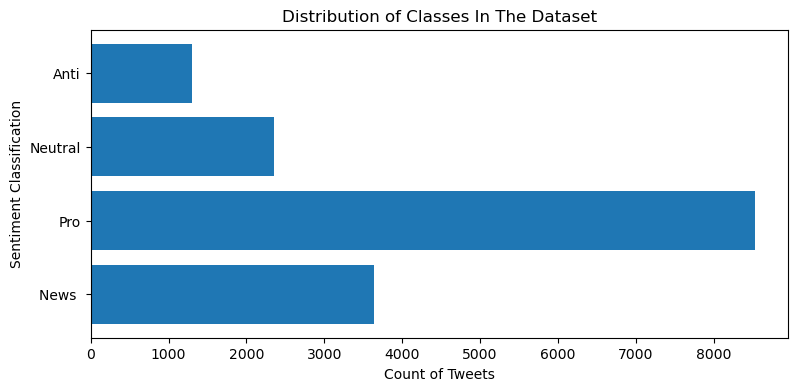

In [88]:
senti_counts = df_train["sentiment"].value_counts()
news = senti_counts[2] 
pro = senti_counts[1]   
neutral = senti_counts[0]
anti = senti_counts[-1]  

plt.figure( figsize=(9,4))
plt.barh(['News ','Pro','Neutral','Anti'], [news,pro,neutral,anti]) # horizontal bar graph to compare classes of tweets.
plt.colours = ['red', 'green', 'blue', 'orange']
plt.xlabel('Count of Tweets') #X-label of the data
plt.ylabel('Sentiment Classification') #Y_label of the data 
plt.title('Distribution of Classes In The Dataset') #Give the data a title 'Dataset lables distribution'
plt.show()

Resampling
two variants of the most common method available: resampling. Put simply, resampling methods involve modifying the number of observations in each class as follows:

- Downsampling - taking a random subset of the majority class small enough to match the number of observations in the minority class.

- Upsampling - taking repeated random samples from the minority class until we have as many observations as the majority class. This grows the size of the minority class by effectively duplicating observations at random.

In [89]:
#Import the resampling module
from sklearn.utils import resample

In [91]:

df_majority = df_train.copy()[df_train['sentiment'] == 1]
df_minority1 = df_train.copy()[df_train['sentiment'] == 0]
df_minority2 = df_train.copy()[df_train['sentiment'] == 2]
df_minority3 = df_train.copy()[df_train['sentiment'] == -1]


# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=5000,     # Using a benchmark of 3640
                                 random_state=123) # reproducible results
#Upsampling the least minority class
df_minority_up = resample(df_minority1, 
                        replace=True,    # sample without replacement
                        n_samples=5000,     # to match the second majority class
                        random_state=123) # reproducible results

df_minority_up1 = resample(df_minority2, 
                        replace=True,    # sample without replacement
                        n_samples=5000,     # to match the second majority class
                        random_state=123) # reproducible results

df_minority_up2 = resample(df_minority3, 
                        replace=True,    # sample without replacement
                        n_samples=5000,     # to match the second majority class
                        random_state=123) # reproducible results

# Combine minority class with downsampled majority class
df_resampled = pd.concat([df_majority_downsampled,df_minority_up,df_minority_up1, df_minority_up2])
 
# Display new class counts
df_resampled.sentiment.value_counts()


 1    5000
 0    5000
 2    5000
-1    5000
Name: sentiment, dtype: int64

In [92]:
X = df_resampled['message']
y = df_resampled['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16000,)
(4000,)
(16000,)
(4000,)


### 1.A Resampled Logical Regression - bag of words

In [93]:
model = LogisticRegression(C=20,multi_class='ovr') #Call logistic regression model and assign variable 'model'

lrBOW_sam = Pipeline([('cf', cf), ('clf', model)]) #Create a pipeline with the logistic model and bag-of-words


lrBOW_sam.fit(X_train, y_train) #Fit the training set

y_pred= lrBOW_sam.predict(X_test) #Fit the test set

print('accuracy %s' % accuracy_score(y_pred, y_test)) #Print accuracy
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print f1 score
print(classification_report(y_test, y_pred)) #Print classification report

c:\Users\percy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy 0.88975
f1_score 0.8873468527971752
              precision    recall  f1-score   support

          -1       0.93      0.98      0.96       977
           0       0.87      0.91      0.89      1024
           1       0.87      0.73      0.80       995
           2       0.89      0.93      0.91      1004

    accuracy                           0.89      4000
   macro avg       0.89      0.89      0.89      4000
weighted avg       0.89      0.89      0.89      4000



### 1 B Resampled Logical Regression - TF-DF

In [94]:
model = LogisticRegression(C=350,multi_class='ovr') #Call logistic regression model and assign variable 'model'

LrTFIDF_sam = Pipeline([('tfidf', tfidf), ('clf', model)]) #Create a pipeline with the logistic model and bag-of-words


clf_sam1.fit(X_train, y_train) #Fit the training set

y_pred= clf_sam1.predict(X_test) #Fit the test set

print('accuracy %s' % accuracy_score(y_pred, y_test)) #Print accuracy
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print f1 score
print(classification_report(y_test, y_pred)) #Print classification report

c:\Users\percy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy 0.89475
f1_score 0.8927841660379832
              precision    recall  f1-score   support

          -1       0.93      0.98      0.95       977
           0       0.90      0.90      0.90      1024
           1       0.87      0.76      0.81       995
           2       0.88      0.94      0.91      1004

    accuracy                           0.89      4000
   macro avg       0.89      0.90      0.89      4000
weighted avg       0.89      0.89      0.89      4000



 balancing the dataset has lead to a significant improvement in the model. The resampled dataset is performing way better than the model of the original dataset. However, due to downsampling of the data, we see that the pro class f1 score and recall are significantly lower want the rest of the classes

Pro class has a significantly lower f1 score now and recall score

The balance now makes it easier to make predictions on the other classes and seems to be performing much better in this regards

### 2.A Resampled Linear SVC - bag of words


In [96]:

LSVCBOW_sam= Pipeline([('cf', cf),('clf',  LinearSVC())]) #Create a pipeline with the bag or words features and the linearSVC

LSVCBOW_sam.fit(X_train, y_train) #Fit the training data to the pipeline

y_pred = LSVCBOW_sam.predict(X_test) #Make predictions with the test data

print('accuracy %s' % accuracy_score(y_pred, y_test)) #Print out the accuracy
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print out the f1 score
print(classification_report(y_test, y_pred)) #Print out the classification report

c:\Users\percy\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


accuracy 0.88725
f1_score 0.8847274367998845
              precision    recall  f1-score   support

          -1       0.93      0.98      0.96       977
           0       0.86      0.91      0.89      1024
           1       0.86      0.73      0.79       995
           2       0.88      0.93      0.90      1004

    accuracy                           0.89      4000
   macro avg       0.89      0.89      0.88      4000
weighted avg       0.89      0.89      0.88      4000



c:\Users\percy\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### 2.B Linear SVC - TF-DF

In [97]:
LSV_TFIDF_sam= Pipeline([('cf', cf),('clf',  LinearSVC())]) #Create a pipeline with the bag or words features and the linearSVC

LSV_TFIDF_sam.fit(X_train, y_train) #Fit the training data to the pipeline

y_pred = LSV_TFIDF_sam.predict(X_test) #Make predictions with the test data

print('accuracy %s' % accuracy_score(y_pred, y_test)) #Print out the accuracy
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print out the f1 score
print(classification_report(y_test, y_pred)) #Print out the classification report

c:\Users\percy\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


accuracy 0.88725
f1_score 0.8847274367998845
              precision    recall  f1-score   support

          -1       0.93      0.98      0.96       977
           0       0.86      0.91      0.89      1024
           1       0.86      0.73      0.79       995
           2       0.88      0.93      0.90      1004

    accuracy                           0.89      4000
   macro avg       0.89      0.89      0.88      4000
weighted avg       0.89      0.89      0.88      4000



c:\Users\percy\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


The model for linear SVC seems to be getting a high accuracy and high f1 score, which is good however it still struggles to locate the pro sentiments as good as it does the other models.

Pro sentiments are and news sentiments are lower on the precisioin but news seem to have high recall and high f1 rating.

Neutral seems to be consistent accorss all predictions

Negative sentiments seem to be performing very weel, more than all the classes

### 2.C Resampled non Linear SVC - bag of words

In [99]:
nLSVCBOWsam= Pipeline([('cf', cf),('clf',  SVC())]) #Create a pipeline with the bag or words features and the linearSVC

nLSVCBOWsam.fit(X_train, y_train) #Fit the training data to the pipeline

y_pred = nLSVCBOWsam.predict(X_test) #Make predictions with the test data

print('accuracy %s' % accuracy_score(y_pred, y_test)) #Print out the accuracy
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print out the f1 score
print(classification_report(y_test, y_pred)) #Print out the classification report

accuracy 0.8735
f1_score 0.8716108353281273
              precision    recall  f1-score   support

          -1       0.95      0.95      0.95       977
           0       0.86      0.88      0.87      1024
           1       0.84      0.73      0.78       995
           2       0.85      0.94      0.89      1004

    accuracy                           0.87      4000
   macro avg       0.87      0.87      0.87      4000
weighted avg       0.87      0.87      0.87      4000



### 2.D non Linear SVC - TF-DF

In [100]:
## create a pipeline and fit it with a  Support Vector Classifier
from sklearn.svm import SVC #Import SVC from sklearn 


nLSVCsam = Pipeline([('tfidf', tfidf), ('clf', SVC())]) #Add the SVC model to the pipeline

nLSVCsam.fit(X_train, y_train) #Fit the training data
y_pred =nLSVCsam.predict(X_test) #Make predictions to the test set and assign the variable 'y_pred'

print('accuracy %s' % accuracy_score(y_pred, y_test)) #Print the accuracy
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print the f1 score
print(classification_report(y_test, y_pred)) #Print out the classification

accuracy 0.90375
f1_score 0.9031248694196684
              precision    recall  f1-score   support

          -1       0.96      0.97      0.97       977
           0       0.93      0.89      0.91      1024
           1       0.85      0.81      0.83       995
           2       0.88      0.95      0.91      1004

    accuracy                           0.90      4000
   macro avg       0.90      0.90      0.90      4000
weighted avg       0.90      0.90      0.90      4000



In [103]:
## create a pipeline and fit it with a  Support Vector Classifier
from sklearn.svm import SVC #Import SVC from sklearn 
nLSVCTFIDFhsam = Pipeline([('tfidf', tfidf), ('clf', SVC(kernel='rbf', C=60, gamma='scale'))]) #Add the SVC model to the pipeline


nLSVCTFIDFhsam.fit(X_train, y_train) #Fit the training data
y_pred = nLSVCTFIDFhsam.predict(X_test) #Make predictions to the test set and assign the variable 'y_pred'

print('accuracy %s' % accuracy_score(y_pred, y_test)) #Print the accuracy
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print the f1 score
print(classification_report(y_test, y_pred)) #Print out the classification

accuracy 0.90775
f1_score 0.907378178963211
              precision    recall  f1-score   support

          -1       0.96      0.98      0.97       977
           0       0.93      0.89      0.91      1024
           1       0.85      0.82      0.83       995
           2       0.89      0.94      0.92      1004

    accuracy                           0.91      4000
   macro avg       0.91      0.91      0.91      4000
weighted avg       0.91      0.91      0.91      4000



The model for non linear SVC seems to be getting a high accuracy and high f1 score, which is good however it still struggles to locate the pro sentiments as good as it does the other models.

Pro sentiments are and news sentiments are lower on the precisioin but news seem to have high recall and high f1 rating.

Neutral seems to be consistent accorss all predictions

Negative sentiments seem to be performing very weel, more than all the classes

### 3 A Resampled Decision Trees -  bag of words

In [113]:

DT = DecisionTreeClassifier(random_state=42)
DTBOWsam= Pipeline([('cf', cf),('cnt', knn)]) #Create a pipeline with the bag or words features and the linearSVC

DTBOWsam.fit(X_train, y_train) #Fit the training data to the pipeline

y_pred = DTBOWsam.predict(X_test) #Make predictions with the test data
print('accuracy %s' % accuracy_score(y_pred, y_test)) #Print the accuracy
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print the f1-score
print(classification_report(y_test, y_pred)) #Print the classification report
               

accuracy 0.53
f1_score 0.5063728150578233
              precision    recall  f1-score   support

          -1       0.62      0.62      0.62       977
           0       0.40      0.90      0.55      1024
           1       0.81      0.18      0.29       995
           2       0.87      0.42      0.56      1004

    accuracy                           0.53      4000
   macro avg       0.68      0.53      0.51      4000
weighted avg       0.67      0.53      0.51      4000



The model for Decision Trees bag of words is be getting a lower accuracy and high f1 score.
Pro sentiments are and news sentiments are lower on the precisioin but news seem to have high recall and high f1 rating.

Neutral seems to be consistent accorss all predictions

Negative sentiments seem to be performing very weel, more than all the classes

### 3 B Resampled Decision Trees - TF_DF

In [109]:

DT = DecisionTreeClassifier(random_state=42)
DTTFIDFsam= Pipeline([('tfidf', tfidf),('cnb', DT)]) #Create a pipeline with the bag or words features and the linearSVC

DTTFIDFsam.fit(X_train, y_train) #Fit the training data to the pipeline

y_pred = DTTFIDFsam.predict(X_test) #Make predictions with the test data
print('accuracy %s' % accuracy_score(y_pred, y_test)) #Print the accuracy
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print the f1-score
print(classification_report(y_test, y_pred)) #Print the classification report
               

accuracy 0.81675
f1_score 0.8084036275342226
              precision    recall  f1-score   support

          -1       0.85      0.97      0.91       977
           0       0.82      0.87      0.84      1024
           1       0.76      0.55      0.63       995
           2       0.82      0.88      0.85      1004

    accuracy                           0.82      4000
   macro avg       0.81      0.82      0.81      4000
weighted avg       0.81      0.82      0.81      4000



The model for Decision Trees is be getting a high accuracy and high f1 score, which is good however it still struggles to locate the pro sentiments as good as it does the other models.

Pro sentiments are and news sentiments are lower on the precisioin but news seem to have high recall and high f1 rating.

Neutral seems to be consistent accorss all predictions

Negative sentiments seem to be performing very well, more than all the classes

### 4. A Resampled Naive Bayes - Bag of words

In [120]:
naive_bayes =  BernoulliNB()
nbBOWsam= Pipeline([('cf', cf),('cnb',  naive_bayes)]) #Create a pipeline with the bag or words features and the linearSVC

nbBOWsam.fit(X_train, y_train) #Fit the training data to the pipeline

y_pred = nbBOWsam.predict(X_test) #Make predictions with the test data
print('accuracy %s' % accuracy_score(y_pred, y_test)) #Print the accuracy
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print the f1-score
print(classification_report(y_test, y_pred)) #Print the classification report
               

accuracy 0.82925
f1_score 0.8253631734006931
              precision    recall  f1-score   support

          -1       0.85      0.94      0.89       977
           0       0.83      0.81      0.82      1024
           1       0.81      0.65      0.72       995
           2       0.82      0.91      0.86      1004

    accuracy                           0.83      4000
   macro avg       0.83      0.83      0.83      4000
weighted avg       0.83      0.83      0.83      4000



### 4. B Resampled Naive Bayes - TF-DF

In [119]:
naive_bayes =  BernoulliNB()
nbtfidfsam= Pipeline([('tfidf', tfidf),('cnb',  naive_bayes)]) #Create a pipeline with the bag or words features and the linearSVC

nbtfidfsam.fit(X_train, y_train) #Fit the training data to the pipeline

y_pred = nbtfidfsam.predict(X_test) #Make predictions with the test data
print('accuracy %s' % accuracy_score(y_pred, y_test)) #Print the accuracy
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print the f1-score
print(classification_report(y_test, y_pred)) #Print the classification report
               

accuracy 0.82925
f1_score 0.8253631734006931
              precision    recall  f1-score   support

          -1       0.85      0.94      0.89       977
           0       0.83      0.81      0.82      1024
           1       0.81      0.65      0.72       995
           2       0.82      0.91      0.86      1004

    accuracy                           0.83      4000
   macro avg       0.83      0.83      0.83      4000
weighted avg       0.83      0.83      0.83      4000



The model for Naive Bayes seems to be getting a high accuracy and high f1 score
Pro sentiments are and news sentiments are lower on the precisioin but news seem to have high recall and high f1 rating.

Neutral seems to be consistent accorss all predictions

Negative sentiments seem to be performing very weel, more than all the classes

### 5.A Resampled KNN - bag of words


In [111]:

knn = KNeighborsClassifier(10)
knnBOWsam= Pipeline([('cf', cf),('cnk', knn)]) #Create a pipeline with the bag or words features and the linearSVC

knnBOWsam.fit(X_train, y_train) #Fit the training data to the pipeline

y_pred = knnBOWsam.predict(X_test) #Make predictions with the test data
print('accuracy %s' % accuracy_score(y_pred, y_test)) #Print the accuracy
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print the f1-score
print(classification_report(y_test, y_pred)) #Print the classification report
               

accuracy 0.53
f1_score 0.5063728150578233
              precision    recall  f1-score   support

          -1       0.62      0.62      0.62       977
           0       0.40      0.90      0.55      1024
           1       0.81      0.18      0.29       995
           2       0.87      0.42      0.56      1004

    accuracy                           0.53      4000
   macro avg       0.68      0.53      0.51      4000
weighted avg       0.67      0.53      0.51      4000



### 5.B Resampled KNN - TF_DF

In [112]:

knn = KNeighborsClassifier(10)
knnTFIDFsam= Pipeline([('tfidf', tfidf),('cnkt', knn)]) #Create a pipeline with the bag or words features and the linearSVC

knnTFIDFsam.fit(X_train, y_train) #Fit the training data to the pipeline

y_pred = knnTFIDFsam.predict(X_test) #Make predictions with the test data
print('accuracy %s' % accuracy_score(y_pred, y_test)) #Print the accuracy
print('f1_score %s' % f1_score(y_test,y_pred,average='weighted')) #Print the f1-score
print(classification_report(y_test, y_pred)) #Print the classification r

accuracy 0.673
f1_score 0.6665406747481456
              precision    recall  f1-score   support

          -1       0.64      0.82      0.72       977
           0       0.65      0.63      0.64      1024
           1       0.67      0.47      0.56       995
           2       0.74      0.77      0.75      1004

    accuracy                           0.67      4000
   macro avg       0.67      0.67      0.67      4000
weighted avg       0.67      0.67      0.67      4000



The model for Key nearest Neighbours seems to be getting a high accuracy and high f1 score, which is good however it still struggles to locate the pro sentiments as good as it does the other models.

Pro sentiments are lower on the precision but news seem to have high recall and high f1 rating.

Neutral seems to be consistent accorss all predictions

Negative sentiments seem to be performing very weel, more than all the classes

### Kaggle Submission Generation

In [ ]:
test_x = df_test['message'] 

In [ ]:
y3_predict = clf_nlsvc.predict(test_x)

In [ ]:
df_test['sentiment'] = y3_predict

In [ ]:
df_test['sentiment'] = df_test['sentiment'].astype(int)

In [ ]:
df_test[['tweetid', 'sentiment']].to_csv('nonlinearSVCBalanced-unclean10.csv', index=False)

<a id="six"></a>

## 6. Model Performance

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

| ⚡ Description: Model performance ⚡                                                                                                                                      |
| :------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---


In [118]:
data = {
    'Model': ['Logistical Regression', 'Linear SVC', 'non Linear SVC', 'Decision trees', 'Naive Bayes', 'Key Nearest Neighbour'],
    'imbalanced Acurracy Score BOW ': [74.68, 72.68, 73.70, 65.89, 69.21, 39.53],
    'imbalanced f1_score BOW': [73.99, 72.55, 71.45, 65.89, 63.17, 41.91],'imbalanced Acurracy Score TF-DF ': [74.2, 74.74, 74.36, 61.91, 69.21, 69.21],
    'imbalanced f1_score TF-DF': [73.53, 73.8, 71.63, 61.09, 63.17, 63.17]}

summary_table = pd.DataFrame(data)

summary_table


,Model,imbalanced Acurracy Score BOW,imbalanced f1_score BOW,imbalanced Acurracy Score TF-DF,imbalanced f1_score TF-DF
0,Logistical Regression,74.68,73.99,74.20,73.53
1,Linear SVC,72.68,72.55,74.74,73.80
2,non Linear SVC,73.70,71.45,74.36,71.63
3,Decision trees,65.89,65.89,61.91,61.09
4,Naive Bayes,69.21,63.17,69.21,63.17
5,Key Nearest Neighbour,39.53,41.91,69.21,63.17


In [114]:
data = {'Model': ['Logistical Regression', 'Linear SVC','non Linear SVC', 'Decision trees', 'Naive Bayes', 'Key Nearest Neighbour'],
    'balanced Acurracy Score BOW ': [88.98, 88.73, 87.35, 53.00, 82.92, 53.00],
    'balanced f1_score BOW': [88.73, 88.47, 87.16, 63.00, 82.53, 50.63],'balanced Acurracy Score TF-DF ': [89.47, 88.72, 90.71, 53.00, 82.92, 67.30],
    'balanced f1_score TF-DF': [89.27, 88.47, 90.73, 50.63, 82.53, 66.65]}

summary_table = pd.DataFrame(data)

summary_table


,Model,balanced Acurracy Score BOW,balanced f1_score BOW,balanced Acurracy Score TF-DF,balanced f1_score TF-DF
0,Logistical Regression,88.98,88.73,89.47,89.27
1,Linear SVC,88.73,88.47,88.72,88.47
2,non Linear SVC,87.35,87.16,90.71,90.73
3,Decision trees,53.00,63.00,53.00,50.63
4,Naive Bayes,82.92,82.53,82.92,82.53
5,Key Nearest Neighbour,53.00,50.63,67.30,66.65


Generally the TF-DF models perform better than the Bag of Words(BOW) models except the Decision Trees.

Balanced data models perform better than the unbalanced data except for the decision trees. 

Non Linear SVC is the best performing model. 

<a id="seven"></a>

## 7. Model Explanations

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

| ⚡ Description: Model explanation ⚡                                                                                                                                                                              |
| :---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---


SVC

 Suppose some given data points each belong to one of two classes, and the goal is to decide which class a new data point will be in. In the case of support vector machines, a data point is viewed as a 
�
p-dimensional vector (a list of 
�
p numbers), and we want to know whether we can separate such points with a 
(
�
−
1
)
(p-1)-dimensional hyperplane. This is called a linear classifier. There are many hyperplanes that might classify the data. One reasonable choice as the best hyperplane is the one that represents the largest separation, or margin, between the two classes. So we choose the hyperplane so that the distance from it to the nearest data point on each side is maximized. If such a hyperplane exists, it is known as the maximum-margin hyperplane and the linear classifier it defines is known as a maximum-margin classifier; or equivalently, the perceptron of optimal stability.[citation needed]

More formally, a support vector machine constructs a hyperplane or set of hyperplanes in a high or infinite-dimensional space, which can be used for classification, regression, or other tasks like outliers detection.[3] Intuitively, a good separation is achieved by the hyperplane that has the largest distance to the nearest training-data point of any class (so-called functional margin), since in general the larger the margin, the lower the generalization error of the classifier.[4] A lower generalization error means that the implementer is less likely to experience overfitting.




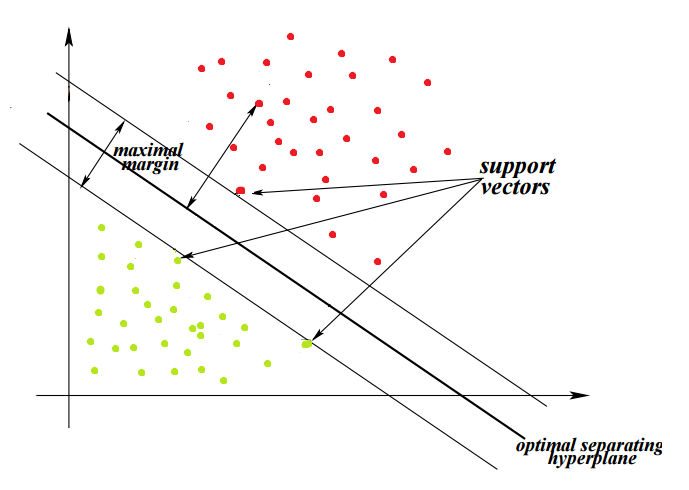